In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# サンプルデータを使います。
flight_dframe = sns.load_dataset('flights')

In [3]:
flight_dframe.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
flight_dframe = flight_dframe.pivot(index='month',
                                    columns='year',
                                    values='passengers')

In [5]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<Axes: xlabel='year', ylabel='month'>

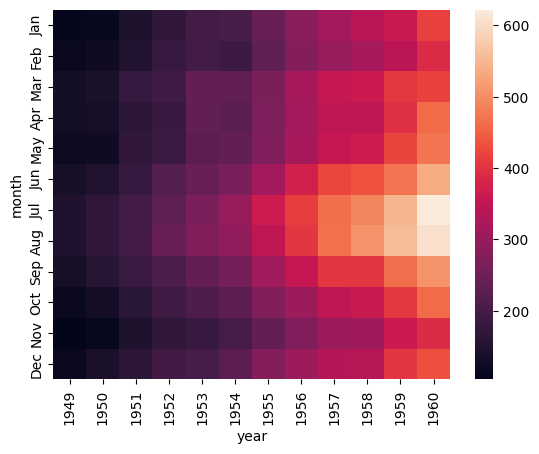

In [6]:
sns.heatmap(flight_dframe)

<Axes: xlabel='year', ylabel='month'>

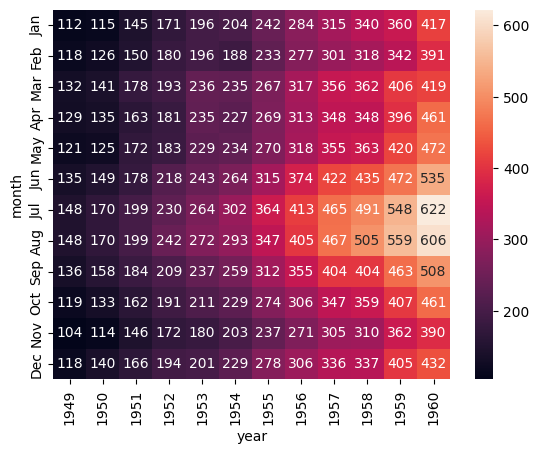

In [7]:
# 数字を書き込めます。
sns.heatmap(flight_dframe, annot=True, fmt='d')

<Axes: xlabel='year', ylabel='month'>

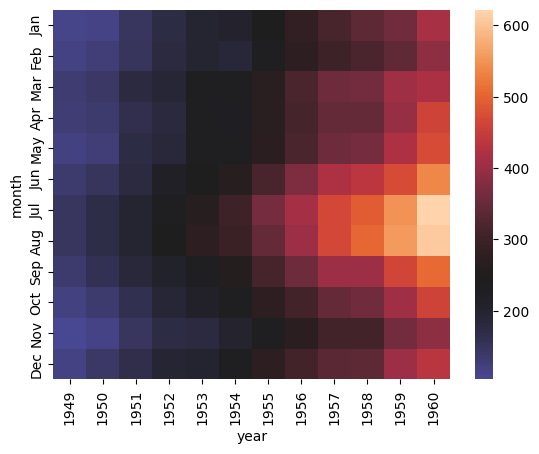

In [8]:
#中心を指定して、色を変えられます。
sns.heatmap(flight_dframe,
            center=flight_dframe.loc['Jan', 1955])

<Axes: xlabel='year', ylabel='month'>

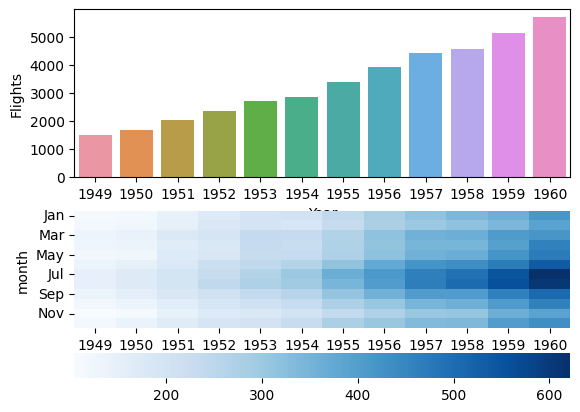

In [9]:
f, (axis1, axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot(year_dframe, x='Year', y='Flights', ax=axis1)
sns.heatmap(flight_dframe,
            cmap='Blues',
            ax=axis2,
            cbar_kws={'orientation':'horizontal'})

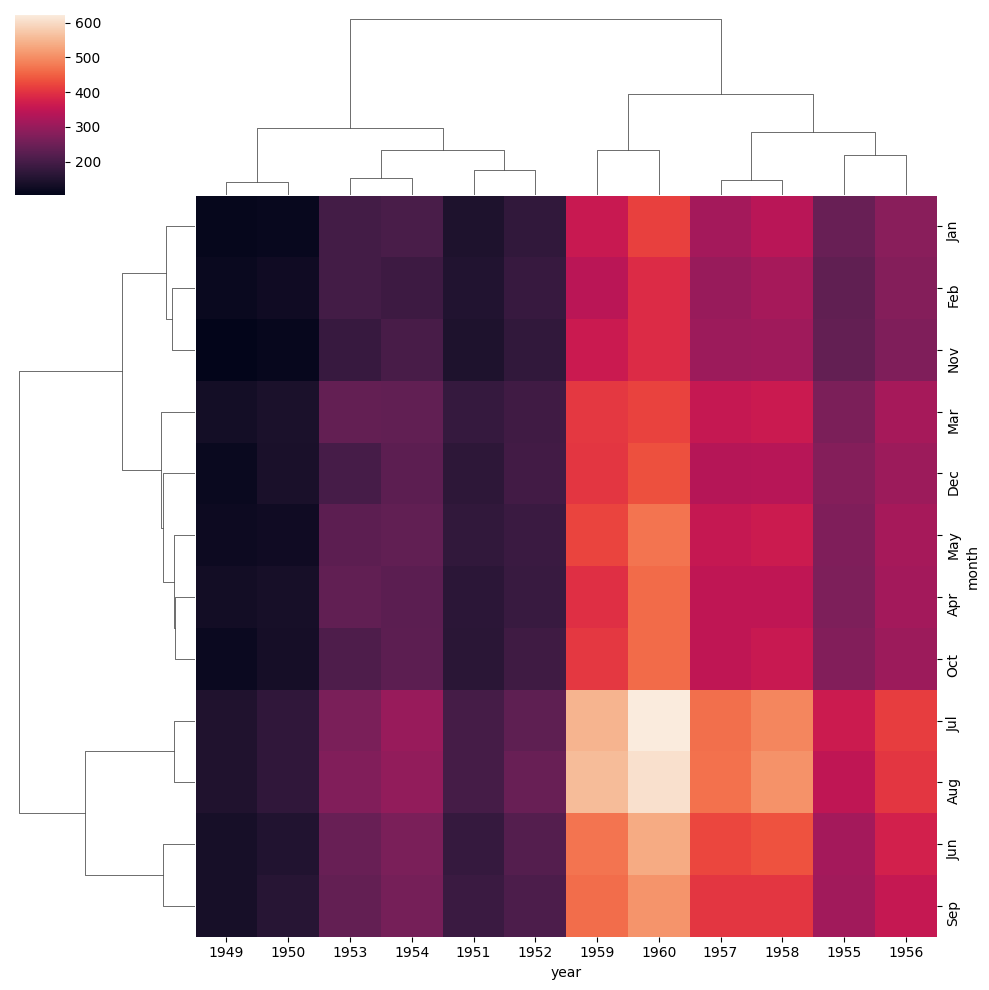

In [10]:
sns.clustermap(flight_dframe)

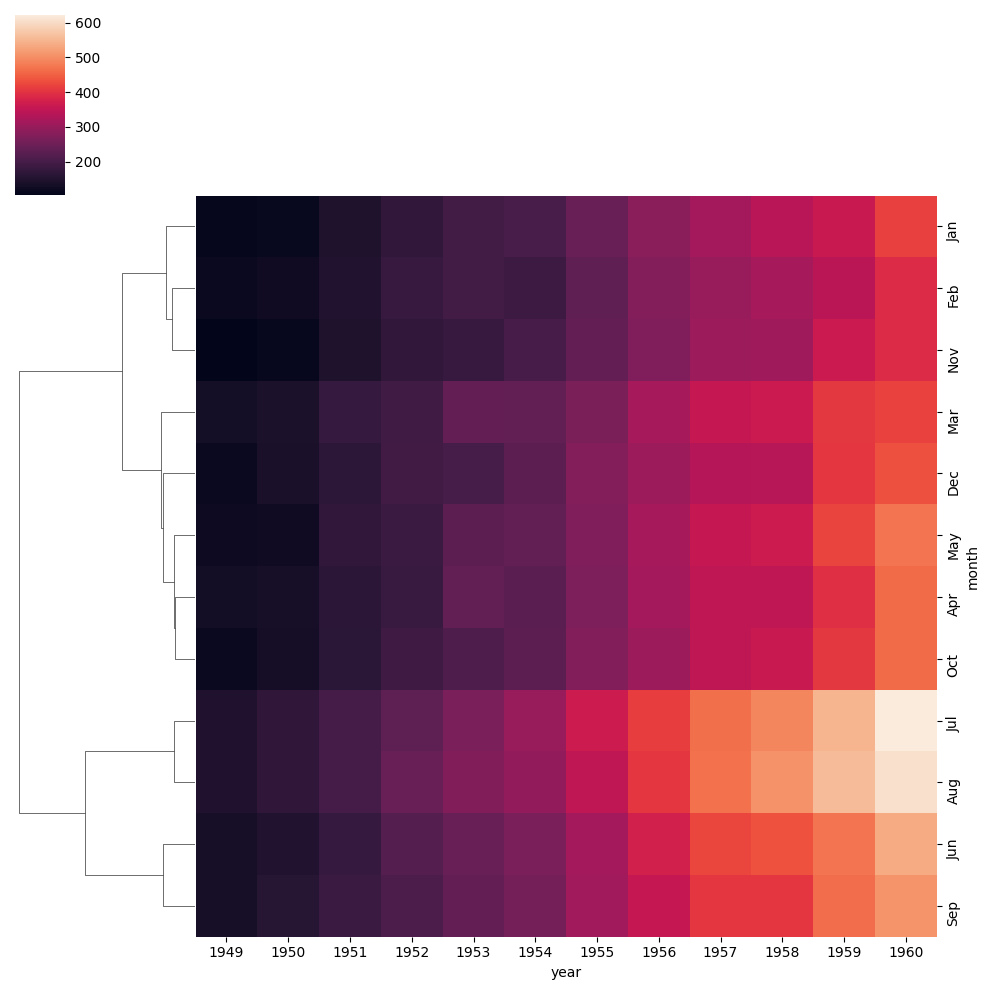

In [11]:
sns.clustermap(flight_dframe, col_cluster=False)

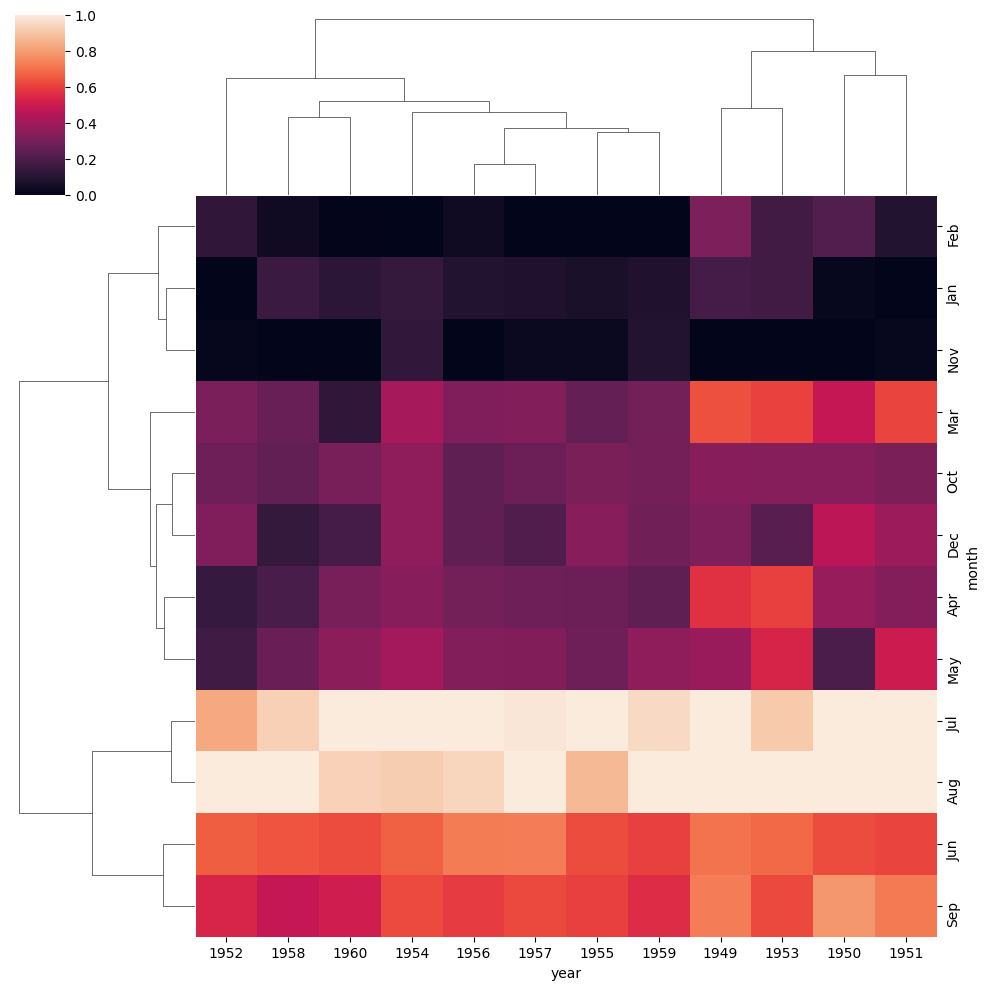

In [12]:
# データの最大最小正規化（最小値を0に、最大値が1になるようにする）
sns.clustermap(flight_dframe, standard_scale=1)

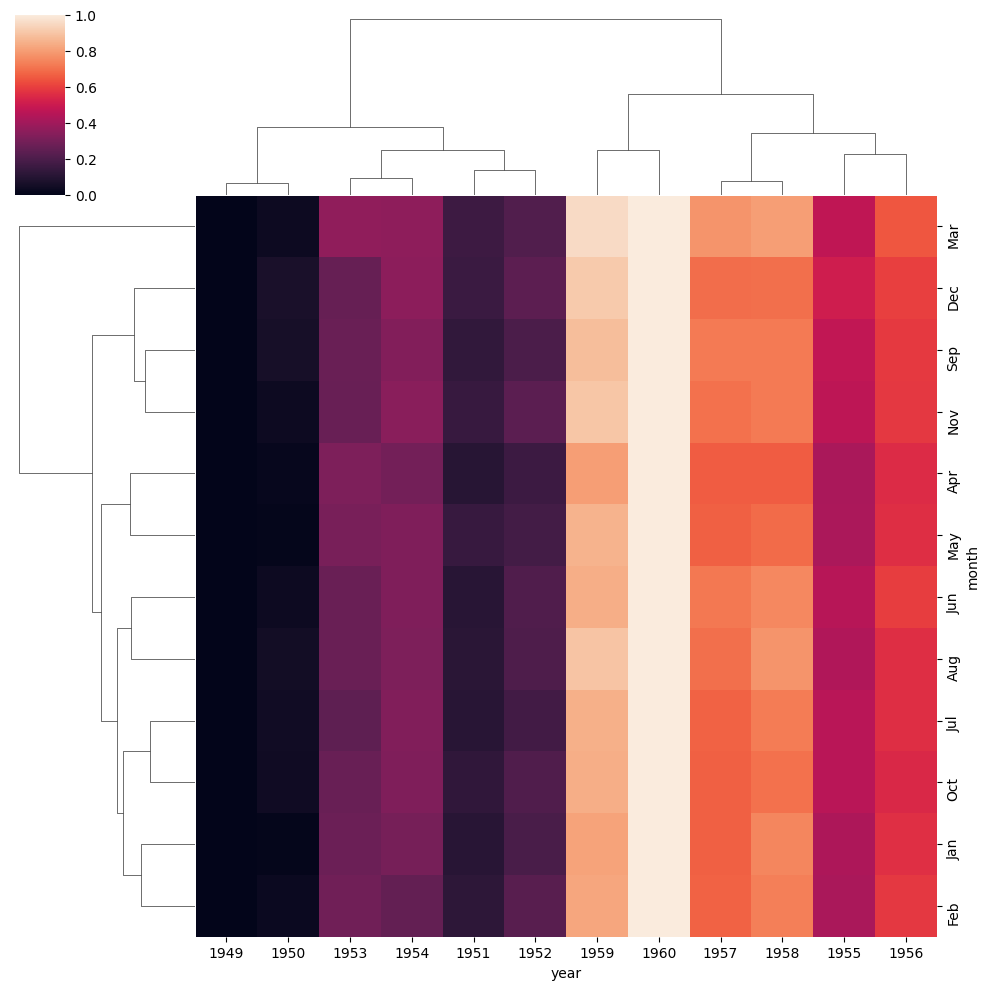

In [13]:
sns.clustermap(flight_dframe, standard_scale=0)

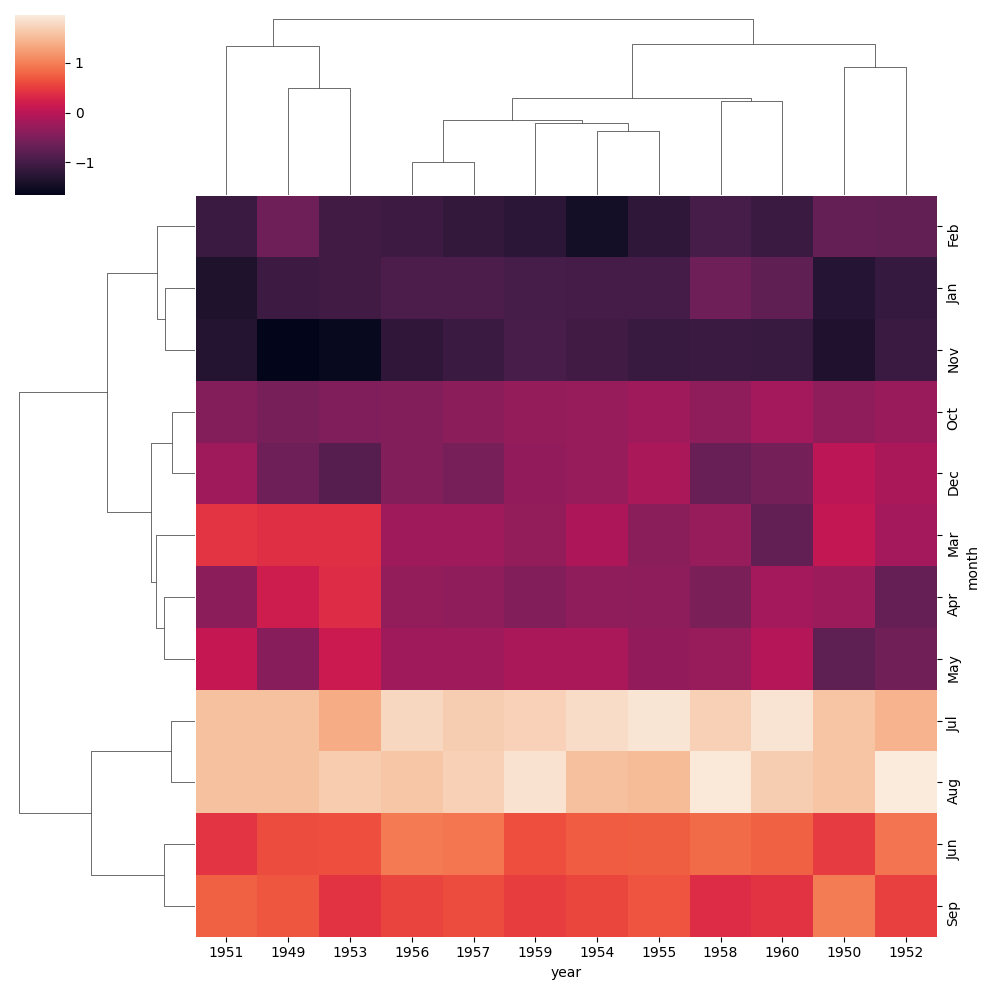

In [14]:
# 平均を引いて標準偏差で割る（平均が0に、標準偏差が1になるようにする）
# z-score（標準化）
sns.clustermap(flight_dframe, z_score=1)